In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
def cv_resize(image, ratio):
    width = int(image.shape[1]*ratio)
    height = int(image.shape[0]*ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

In [3]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [5]:
file_name = 'receipt2.jpg'
#file_name = 'archive/20201005_215859.jpg'
img = Image.open(file_name)
img.thumbnail((800,800), Image.ANTIALIAS)
#img

In [6]:
image = cv2.imread(file_name)
resize_ratio = 500/image.shape[0]
original = image.copy()
image = cv_resize(image, resize_ratio)

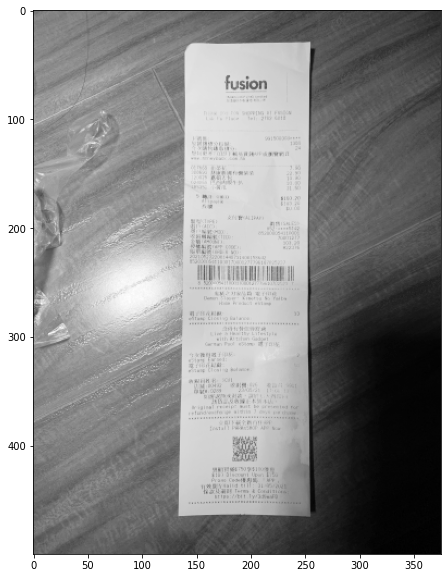

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray)

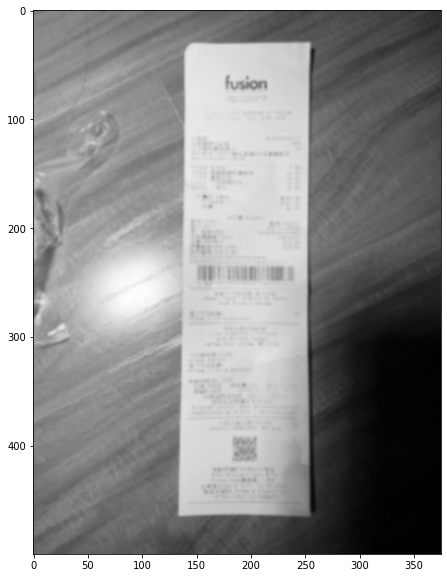

In [8]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)
plot_gray(blurred)

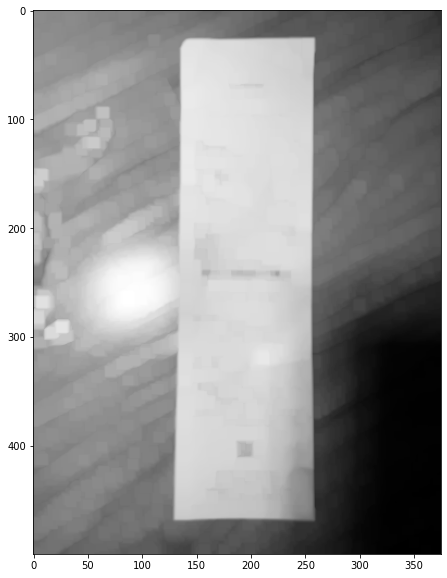

In [9]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilated = cv2.dilate(blurred, rectKernel)
plot_gray(dilated)

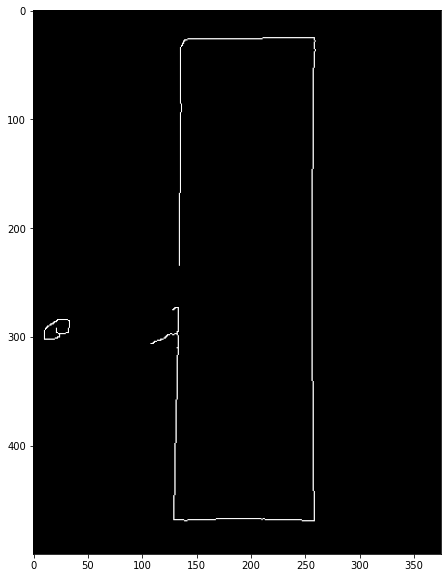

In [10]:
edged = cv2.Canny(dilated, 30, 200, apertureSize=3)
plot_gray(edged)

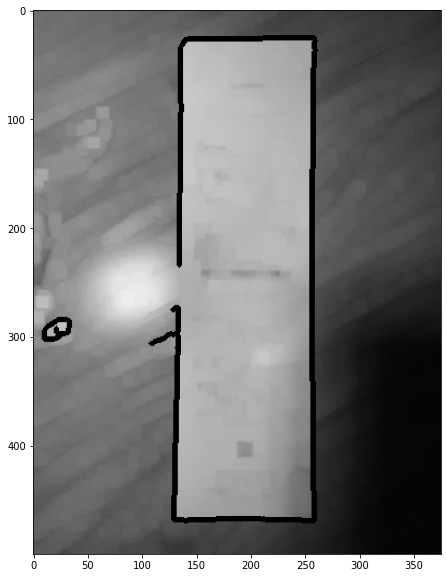

In [11]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(dilated.copy(), contours, -1, (0, 255,0), 3)
plot_rgb(image_with_contours)

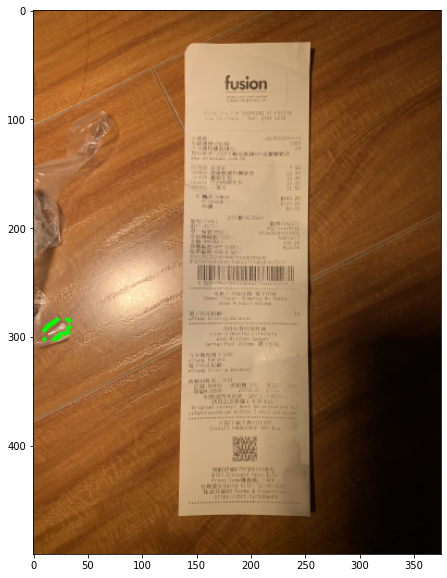

In [12]:
#largest_contours = sorted(contours, key = cv2.contourArea, reverse=True)[:len(contours)//2]
#image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
#plot_rgb(image_with_largest_contours)
largest_contours = sorted(contours, key = cv2.contourArea, reverse=True)[:len(contours)//2]
for c in largest_contours:
    image_with_largest_contours = cv2.drawContours(image.copy(), c, -1, (0,255,0), 3)
    plot_rgb(image_with_largest_contours)


In [78]:
#

In [66]:
def approximate_contour(contour):
    peri = cv2.arcLength(contour, True)
    return cv2.approxPolyDP(contour, 0.01 * peri, True)

def get_receipt_contour(contours):
    max_h = 0
    max_4 = []
    for c in contours:
        approx = approximate_contour(c)
        x, y, w, h = cv2.boundingRect(approx)
        if max_h:
            max_h = h if max_h < h else max_h
            max_4 = [(x, y, w, h), c]
        else:
            max_h = h
            max_4 = [(x, y, w, h), c]

    return max_4
        


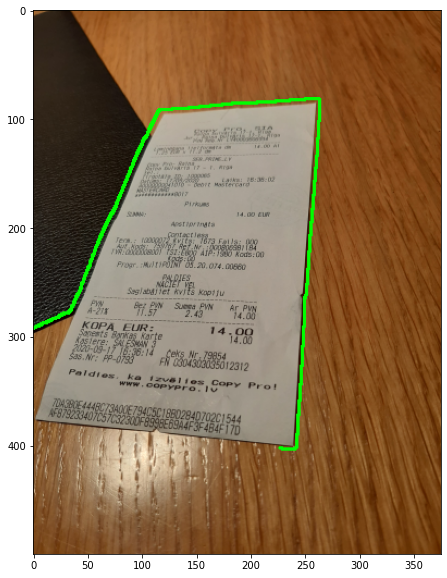

In [74]:
receipt_contour = get_receipt_contour(largest_contours)
image_with_receipt_contour = cv2.drawContours(image.copy(), [receipt_contour[-1]], -1, (0, 255,0), 2)
plot_rgb(image_with_receipt_contour)

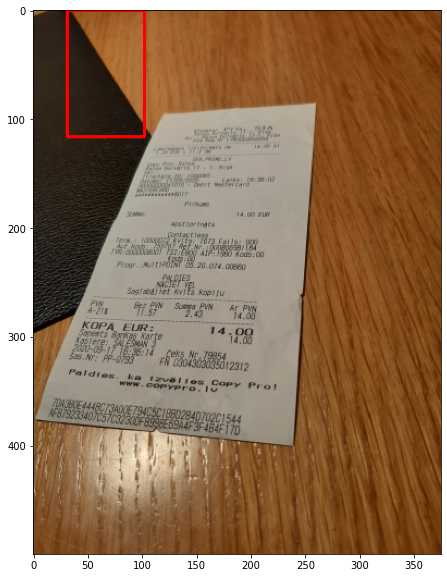

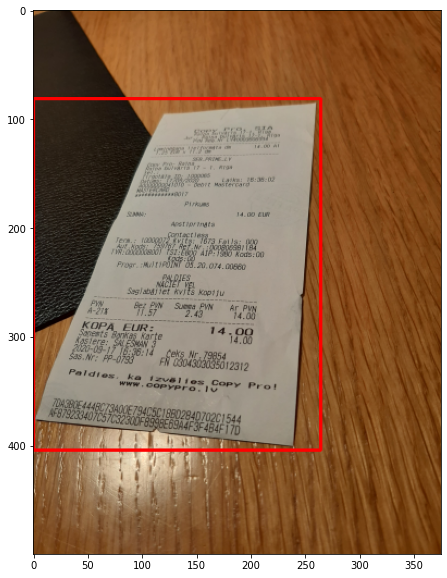

In [75]:
for c in largest_contours:
    approx = approximate_contour(c)
    x, y, w, h = cv2.boundingRect(approx)
    ima_c = cv2.rectangle(image.copy(), (x, y), (x+w, y+h), (0,0,255), 2)
    plot_rgb(ima_c)

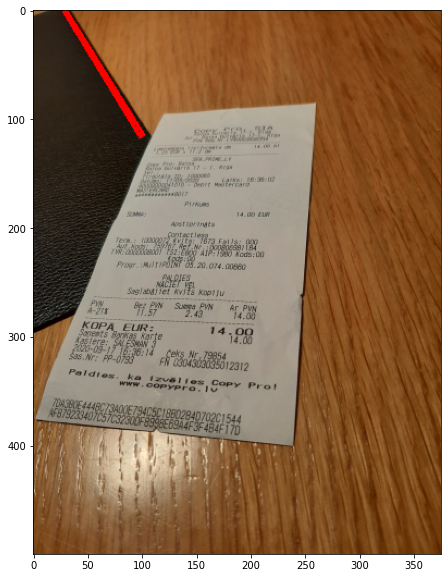

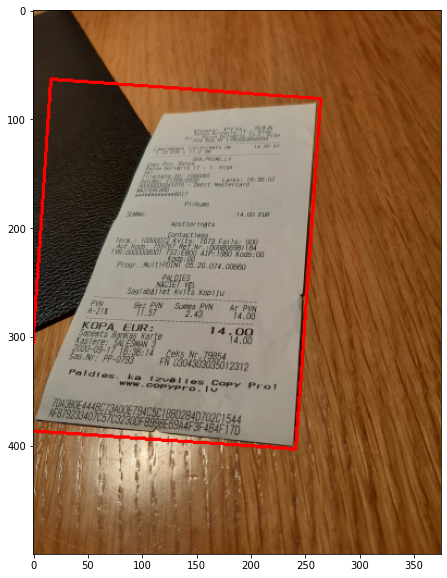

In [77]:
for c in largest_contours:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    ima_c = cv2.drawContours(image.copy(), [box], 0, (0,0,255), 2)
    plot_rgb(ima_c)
